# Parsing 'Results*' Files

This section will be used to parse the results file in `data/` and create a csv with the required outputs.

In [13]:
import glob
import pandas as pd
from bs4 import BeautifulSoup


In [20]:
def get_attr_from_tag(content, attribute:str)->str:
    if isinstance(content, str):
        tag = BeautifulSoup(content, 'html.parser').b
    else:
        tag = content
    return tag[attribute]

def clean_title(title:str)->str:
    cleaned = title.replace('&amp;', '&')
    return cleaned

def get_date_from_tag(content)->str:
    attr_val = get_attr_from_tag(content, attribute='href')
    date = attr_val.split('/')[1]
    return date

def get_url_from_tag(content)->str:
    attr_val = get_attr_from_tag(content, attribute='href')
    local_path = attr_val
    url = 'https://sputnikglobe.com' + local_path
    return url

def get_title_from_tag(content)->str:
    attr_val = get_attr_from_tag(content, attribute='title')
    title = clean_title(attr_val)
    return title

In [11]:
results_paths = glob.glob(pathname='../data/results_*.txt')

In [22]:
data_dict = {'date':[], 'url':[], 'title':[]}
for result_path in results_paths:
    with open(file=result_path, mode='r', encoding='utf-8') as f:
        soup = BeautifulSoup(f.read())
    results = soup.find_all(name='a', attrs={'href':True, 'title':True, 'class':False})
    for result in results:
        data_dict['date'].append(get_date_from_tag(result))
        data_dict['url'].append(get_url_from_tag(result))
        data_dict['title'].append(get_title_from_tag(result))
df = pd.DataFrame(data_dict)

In [25]:
print(df.shape[0])
df.tail()

4503


,date,url,title
4498,20210901,https://sputnikglobe.com/20210901/senior-fda-v...,Senior FDA Vaccine Officials Resign Amid Repor...
4499,20210901,https://sputnikglobe.com/20210901/indian-state...,Indian State Orders Probe as Spreading 'Myster...
4500,20210901,https://sputnikglobe.com/20210901/israeli-stat...,Israeli State Comptroller Slams Netanyahu's CO...
4501,20210901,https://sputnikglobe.com/20210901/norway-sees-...,Norway Sees Record COVID-19 Infection Rates De...
4502,20210901,https://sputnikglobe.com/20210901/live-updates...,Live Updates: Ireland to Lift Most COVID-19 Re...


In [26]:
df.to_csv('../data/results_sputnikglobe_20201201_20211130.csv')

# Scraping Content from Results

This section will be used to parse the results file in `data/` and create a csv with the required outputs.

In [ ]:
from selenium import webdriver

In [31]:
driver = webdriver.Firefox()
driver.get('https://sputnikglobe.com/20210430/biden-us-military-brass-will-decide-whether-to-issue-covid-19-vaccine-mandate-for-troops-1082775132.html')
print(driver.page_source)
driver.quit()

<html lang="en" data-lang="eng" data-charset="" dir="ltr" style="overflow: hidden;"><head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#"><title>Biden: US Military Brass Will Decide Whether to Issue COVID-19 Vaccine Mandate for Troops</title><meta name="description" content="Since the onset of the COVID-19 pandemic, the US has reported upwards of 32 million COVID-19 cases and nearly 576,000 deaths, according to figures released by... 30.04.2021, Sputnik International"><meta name="keywords" content="military &amp; intelligence, newsfeed, joe biden, us military"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta name="robots" content="index, follow, max-image-preview:large"><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=yes"><meta name="HandheldFriendly" content="true"><meta name="MobileOptimzied" content="w

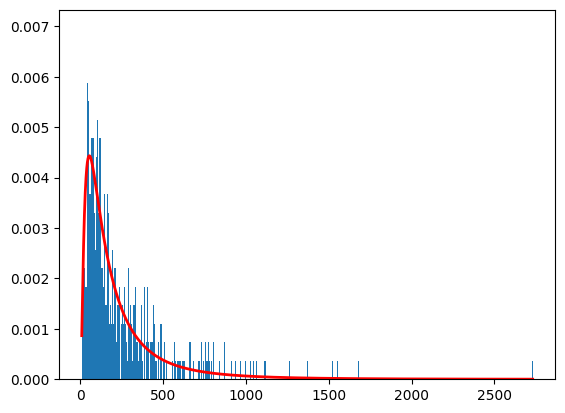

In [40]:
import numpy as np

mu, sigma = 5., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 600)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 600, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()